In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import Data
from google.colab import drive
drive.mount('/content/drive')
X_test = pd.read_csv('/content/drive/MyDrive/BTAI/tweetsum_test.csv')
X_train = pd.read_csv('/content/drive/MyDrive/BTAI/tweetsum_train.csv')
X_val = pd.read_csv('/content/drive/MyDrive/BTAI/tweetsum_val.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Correlation
## There seems to be poor correlation amongst all of the annot_ids with some exceptions

In [ ]:
def merge(df1, df2): #merge dfs on sentence
  merged_df = df1.merge(df2, on='sentence', how='inner', suffixes=('_df1', '_df2'), copy=False)

  # merged_df['is_salient_df1'] = merged_df['is_salient_df1'].fillna(merged_df['is_salient_df2'])

  # merged_df = merged_df.drop(columns=['Unnamed: 0_df2',	'dialog_id_df2','sender_df2'])
  merged_df = merged_df.drop_duplicates(subset='Unnamed: 0_df1')
  return merged_df

In [ ]:
df = X_train.copy()
unique_annot_ids = df['annot_id'].unique()

In [ ]:
# seperate dfs by annot_id
dfs = {}
for annot_id, group_df in df.groupby('annot_id'):
    dfs[annot_id] = group_df.drop(columns=['annot_id'])

In [ ]:
# For loop will print correlation per annot_id
for i in range(5):
  for j in range(5):
    merged_df = merge(dfs[i], dfs[j])
    merged_df = merged_df[['is_salient_df1', 'is_salient_df2']]
    merged_df = merged_df.dropna()

    temp = merged_df[['is_salient_df1', 'is_salient_df2']]
    temp = temp.rename(columns={'is_salient_df1': f'annot_id({i})', 'is_salient_df2': f'annot_id({j})'})
    print(temp.corr(method='kendall', numeric_only=False))

             annot_id(0)  annot_id(0)
annot_id(0)     1.000000     0.994566
annot_id(0)     0.994566     1.000000
             annot_id(0)  annot_id(1)
annot_id(0)     1.000000     0.448366
annot_id(1)     0.448366     1.000000
             annot_id(0)  annot_id(2)
annot_id(0)     1.000000     0.453642
annot_id(2)     0.453642     1.000000
             annot_id(0)  annot_id(3)
annot_id(0)     1.000000     0.490935
annot_id(3)     0.490935     1.000000
             annot_id(0)  annot_id(4)
annot_id(0)     1.000000     0.453064
annot_id(4)     0.453064     1.000000
             annot_id(1)  annot_id(0)
annot_id(1)     1.000000     0.447364
annot_id(0)     0.447364     1.000000
             annot_id(1)  annot_id(1)
annot_id(1)      1.00000      0.99556
annot_id(1)      0.99556      1.00000
             annot_id(1)  annot_id(2)
annot_id(1)     1.000000     0.448589
annot_id(2)     0.448589     1.000000
             annot_id(1)  annot_id(3)
annot_id(1)     1.000000     0.449848
annot_id(3) 

In [ ]:
merged_df.head()
temp.head()

,annot_id(4),annot_id(4)
0,True,True
1,False,False
7,False,False
13,False,False
19,False,False


In [ ]:
# set up blank dfs with the same # of enteries to map their df values onto
mockDf = dfs[0].copy()
mockDf['is_salient'] = np.nan # sets missing values to NaN
df0 = mockDf
df1 = mockDf
df2 = mockDf
df3 = mockDf
df4 = mockDf

In [ ]:
df0 = merge(df0, dfs[0])
df1 = merge(df1, dfs[1])
df2 = merge(df2, dfs[2])
df3 = merge(df3, dfs[3])
df4 = merge(df4, dfs[4])

In [ ]:
df0.head()

,Unnamed: 0_df1,dialog_id_df1,sender_df1,sentence,is_salient_df1,Unnamed: 0_df2,dialog_id_df2,sender_df2,is_salient_df2
0,0,b065262210783596c1fe79466b8f8985,customer,So neither my iPhone nor my Apple Watch are re...,NaN,0,b065262210783596c1fe79466b8f8985,customer,True
1,3,b065262210783596c1fe79466b8f8985,customer,Any ideas?,NaN,3,b065262210783596c1fe79466b8f8985,customer,False
8,3899,19b9d8dee062006c887fb81d6f46f026,customer,Any ideas?,NaN,3,b065262210783596c1fe79466b8f8985,customer,False
15,4379,0803de4e0a97d464c98116efa21a38db,customer,Any ideas?,NaN,3,b065262210783596c1fe79466b8f8985,customer,False
22,19115,e49a60ba9797a705d091b2a519b4c8d7,customer,Any ideas?,NaN,3,b065262210783596c1fe79466b8f8985,customer,False


In [ ]:
dfs1 = {
    'df0': df0,
    'df1': df1,
    'df2': df2,
    'df3': df3,
    'df4': df4
}

corrDf = pd.DataFrame()
for df_name, dfs2 in dfs1.items():
    if 'is_salient_df1' in df.columns:
        corrDf[df_name] = dfs2['is_salient_df1']
corrDf = corrDf.applymap(lambda x: 1 if x == True else (0 if x == False else x)) #convert to int

In [ ]:
corrDf
# dfs1

""


In [ ]:
print(corrDf)

Empty DataFrame
Columns: []
Index: []


In [ ]:
corrDf.corr('kendall') # kendall's tau correlation
print(corrDf.corr('kendall') )

Empty DataFrame
Columns: []
Index: []


# Saliency Stats

Number of examples 51483


<Axes: title={'center': 'Count of Salients in X_Train'}, ylabel='Count'>

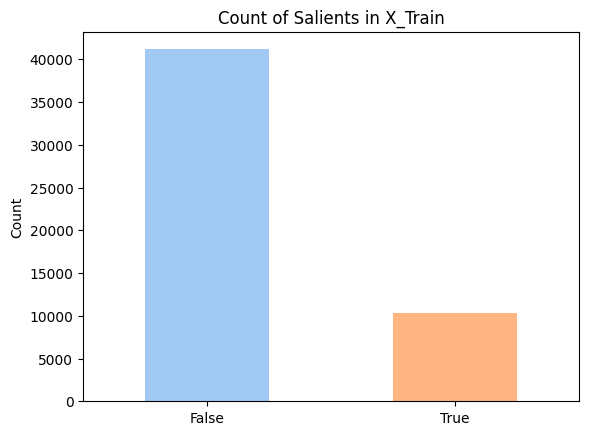

In [ ]:
#Rami's Code
#Important lengths for the size of the dataset
print("Number of examples",len(X_train))
color=sns.color_palette('pastel')
X_train["is_salient"].value_counts().plot(kind="bar",title="Count of Salients in X_Train",ylabel="Count",rot=0, color=color)


Number of examples 7136
Percentage of salient values in X_test: 19.13%


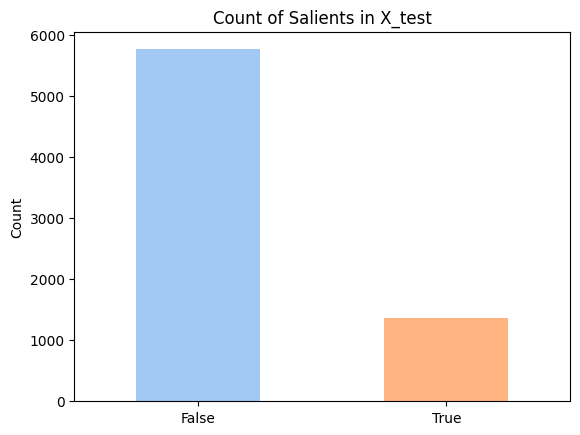

In [ ]:
#hanna's work here: looking at test data
print("Number of examples",len(X_test))
color=sns.color_palette('pastel')
X_test["is_salient"].value_counts().plot(kind="bar",title="Count of Salients in X_test",ylabel="Count",rot=0, color=color)

#get the percentage saliency
salient_count = X_test["is_salient"].sum()  # Count of salient values (assuming 1 indicates saliency)
total_examples = len(X_test)
percentage_salient = (salient_count / total_examples) * 100
print(f"Percentage of salient values in X_test: {percentage_salient:.2f}%")



<Axes: title={'center': 'Sender_Count'}, ylabel='Count'>

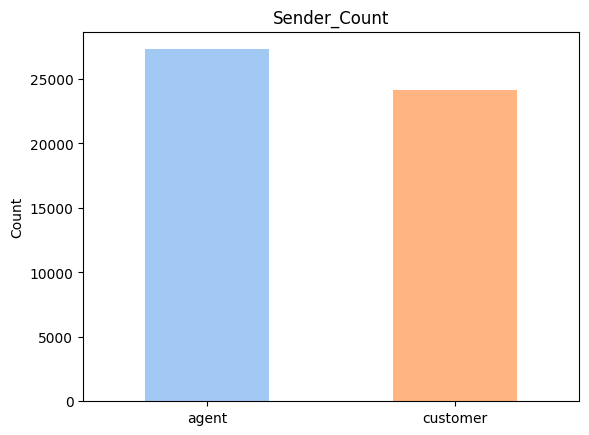

In [ ]:
color=sns.color_palette('pastel')
X_train["sender"].value_counts().plot(kind="bar",title="Sender_Count",ylabel="Count",rot=0,color=color)

## A Look into Annot_Id

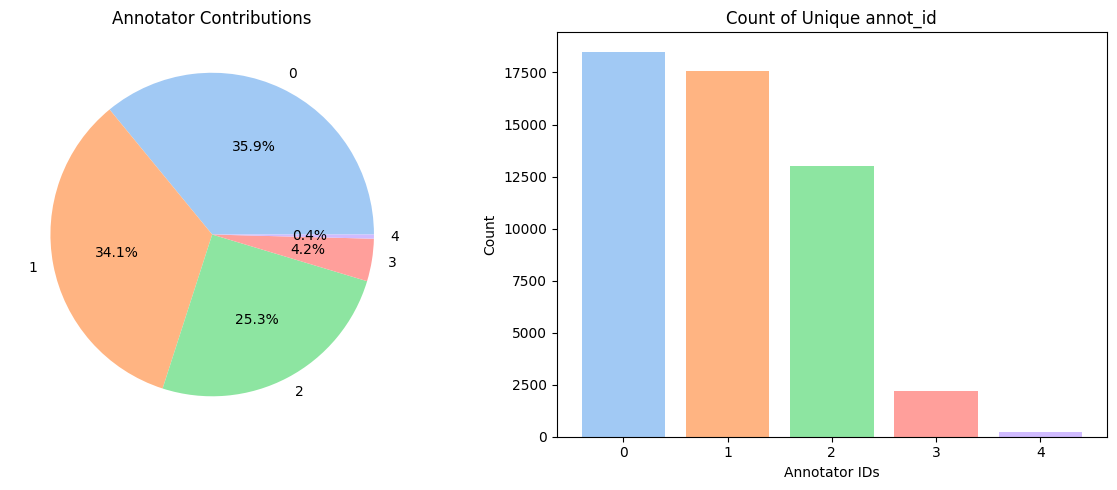

In [ ]:
color=sns.color_palette('pastel')

# Pie chart
IDs = X_train['annot_id'].unique()
Percentage = [(X_train['annot_id'].value_counts() / len(X_train)) * 100]

plt.figure(figsize=(12, 5))  # Create a new figure for better visualization

# Pie chart
plt.subplot(1, 2, 1)  # Create the first subplot for the pie chart
plt.pie(Percentage[0], labels=IDs, colors=color, autopct='%1.1f%%')
plt.title("Annotator Contributions")

# Bar chart
plt.subplot(1, 2, 2)  # Create the second subplot for the bar chart
annotator_counts = X_train['annot_id'].value_counts()
annotator_ids = annotator_counts.index
count_values = annotator_counts.values
plt.bar(annotator_ids, count_values,color=color)
plt.xlabel("Annotator IDs")
plt.ylabel("Count")
plt.title("Count of Unique annot_id")

plt.tight_layout()  # Adjust subplots for better spacing
plt.show()

## % Of Saliency

Annotators_train [0 1 2 3 4] Annotators_val [0 1 2 3 4] Annotators_test [0 1 2 3 4]


<ipython-input-22-0db33a2bbd41>:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.displot(X_train, x="annot_id",hue="is_salient",palette=color,stat='percent',color=color)


False    14825
True      3678
Name: is_salient, dtype: int64
False    14035
True      3521
Name: is_salient, dtype: int64
False    10394
True      2632
Name: is_salient, dtype: int64
False    1741
True      443
Name: is_salient, dtype: int64
False    177
True      37
Name: is_salient, dtype: int64


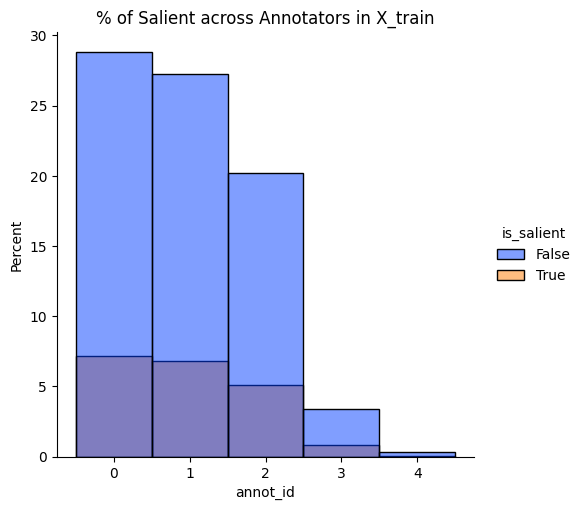

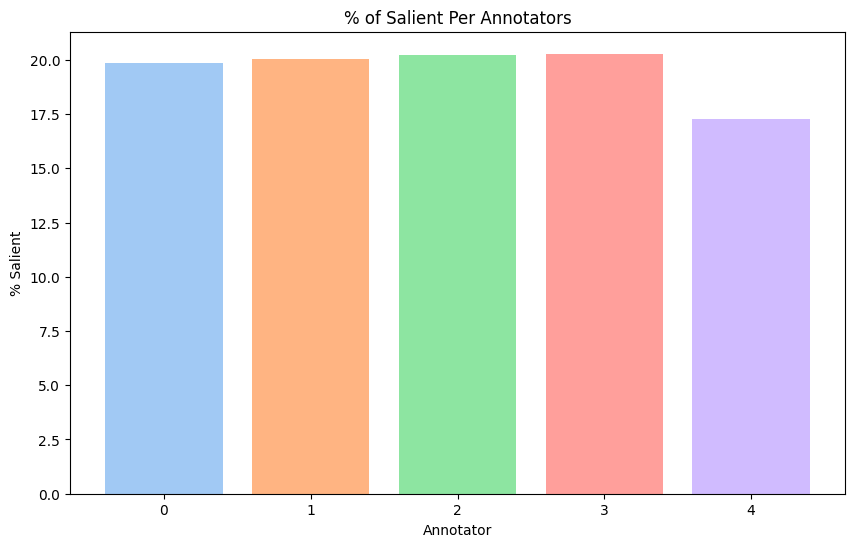

In [ ]:
#for counting print(len(X_train))

#Looking at the number of annotators in each file
Annotators_train=X_train["annot_id"].unique()
Annotators_val=X_val["annot_id"].unique()
Annotators_test=X_test["annot_id"].unique()
print("Annotators_train",Annotators_train,"Annotators_val",Annotators_val,"Annotators_test",Annotators_test)
#All 4 annotators present in the dataset.
color=sns.color_palette('bright')
X_train[["annot_id","is_salient"]].value_counts()
X_val[["annot_id","is_salient"]].value_counts()
X_test[["annot_id","is_salient"]].value_counts()
X_train['annot_id']=X_train['annot_id'].astype(str)
sns.displot(X_train, x="annot_id",hue="is_salient",palette=color,stat='percent',color=color)
plt.title("% of Salient across Annotators in X_train")

#Normalized
annotators_train = X_train["annot_id"].unique()
percentage_salient = []

for annotator in annotators_train:
    subset = X_train[X_train["annot_id"] == annotator] #grabs everything within a certain annot_ID
    total_samples = len(subset)
    salient_counts = subset["is_salient"].value_counts()
    print(salient_counts)
    if True in salient_counts.index:
      percentage = (salient_counts[True] / total_samples) * 100
    else:
        percentage = 0.0

    percentage_salient.append(percentage)

plt.figure(figsize=(10, 6))
plt.bar(annotators_train, percentage_salient, color=sns.color_palette('pastel'))
plt.xlabel('Annotator')
plt.ylabel('% Salient')
plt.title('% of Salient Per Annotators')

# Show the plot
plt.show()

## Sentence Lenght

mean_word_count: 9.160421886836431
salient_sentences_mean_word_count: 15.298225196392202
non_salient_sentences_mean_word_count: 7.623287671232877
10311
41172
The difference in sentence length between salient and non salient sentences is statistically significant.


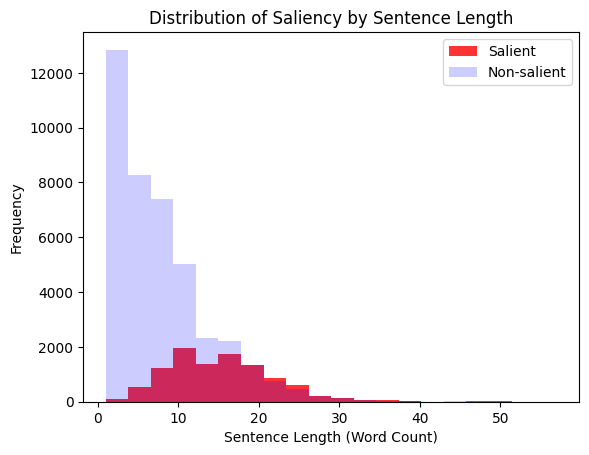

In [ ]:
#Exploring: Are longer sentences more likely to be salient?-Hanna
#create a histogram relating sentence length to percentage of salient sentences
#create a new feature- word_count: can use the len and split functions to find the number of words in each sentence
X_train['word_count']=X_train['sentence'].apply(lambda x:len(x.split()))
#separate the salient and non_salient sentences
salient_sentences=X_train[X_train['is_salient']==True]
non_salient_sentences=X_train[X_train['is_salient']==False]

salient_sentences.head()
non_salient_sentences.head()
mean_word_count=np.mean(X_train['word_count'])
salient_sentences_mean_word_count=np.mean(salient_sentences['word_count'])
non_salient_sentences_mean_word_count=np.mean(non_salient_sentences['word_count'])

#examine the mean word counts of salient sentences versus nonsalient sentences
print('mean_word_count: ' + str(mean_word_count))
print('salient_sentences_mean_word_count: ' + str(salient_sentences_mean_word_count))
print('non_salient_sentences_mean_word_count: '+ str(non_salient_sentences_mean_word_count))

from scipy import stats
import random
#for the wilcoxon test, we need both sample sets to be the same size, we will take a random sample of the salient sentences
print(len(salient_sentences))
print(len(non_salient_sentences))
random.seed(10)
non_salient_sample = random.sample(list(non_salient_sentences['word_count']), len(salient_sentences))
# Perform a wilcoxon test
test_statistic, p_value = stats.wilcoxon(salient_sentences['word_count'], non_salient_sample)

# Check the p-value
if p_value < 0.05:
    print("The difference in sentence length between salient and non salient sentences is statistically significant.")
else:
    print("There is no statistically significant difference in sentence length between salient and non salient sentences.")

plt.hist(salient_sentences['word_count'], bins=20, alpha=.8, label="Salient", color="red")
plt.hist(non_salient_sentences['word_count'], bins=20,alpha=.2, label="Non-salient", color="blue")
plt.xlabel('Sentence Length (Word Count)')
plt.ylabel('Frequency')
plt.title('Distribution of Saliency by Sentence Length')
plt.legend()
plt.show()


## Proportion of Salient Question

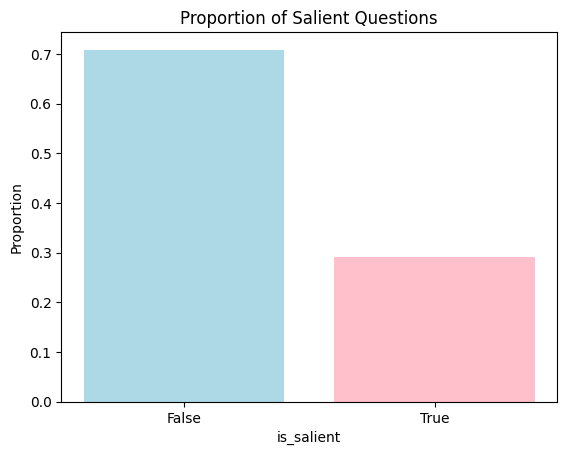

In [ ]:
#if questions are more likely to be salient
#find sentences ending in "?" and start with question words
question_words = ["who", "what", "when", "where", "why", "how", "if"] #were any forgotten?
question_sentences = X_train[(X_train['sentence'].str.endswith('?')) & (X_train['sentence'].str.lower().str.contains(fr'\b(?:{"|".join(question_words)})\b'))]

total_samples = len(question_sentences)
true_proportion = (question_sentences['is_salient'] == True).sum() / total_samples
false_proportion = (question_sentences['is_salient'] == False).sum() / total_samples
plt.bar(['False', 'True'], [false_proportion, true_proportion], color=['lightblue', 'pink'])

plt.xlabel('is_salient')
plt.ylabel('Proportion')
plt.title('Proportion of Salient Questions')
plt.show()


In [ ]:
#adding a new column to X_train "is_question" that flags true for question senteces and false for non-question sentences
X_train['is_question'] = (X_train['sentence'].str.endswith('?') | X_train['sentence'].str.lower().str.contains(fr'\b(?:{"|".join(question_words)})\b'))
X_train['is_question'] = X_train['is_question']
X_train

,Unnamed: 0,dialog_id,annot_id,sender,sentence,is_salient,word_count,is_question
0,0,b065262210783596c1fe79466b8f8985,0,customer,So neither my iPhone nor my Apple Watch are re...,True,22,False
1,1,b065262210783596c1fe79466b8f8985,1,customer,So neither my iPhone nor my Apple Watch are re...,True,22,False
2,2,b065262210783596c1fe79466b8f8985,2,customer,So neither my iPhone nor my Apple Watch are re...,True,22,False
3,3,b065262210783596c1fe79466b8f8985,0,customer,Any ideas?,False,2,True
4,4,b065262210783596c1fe79466b8f8985,1,customer,Any ideas?,False,2,True
...,...,...,...,...,...,...,...,...
51478,51478,da32c7eb1693234417600b1bd3d3dcfc,1,agent,Our support team will look into this.,True,7,False
51479,51479,da32c7eb1693234417600b1bd3d3dcfc,0,agent,Pls provide the previously requested info so I...,True,10,False
51480,51480,da32c7eb1693234417600b1bd3d3dcfc,1,agent,Pls provide the previously requested info so I...,False,10,False
51481,51481,da32c7eb1693234417600b1bd3d3dcfc,0,agent,^RP https://t.co/q1oBDuYAdh,False,2,False
